In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from NN import Basic
from Util.Util import DataUtil

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def draw_losses(nn):
    el, il = nn.log["epoch_loss"], nn.log["iter_loss"]
    ee_base = np.arange(len(el))
    ie_base = np.linspace(0, len(el) - 1, len(il))
    plt.plot(ie_base, il, label="Iter loss")
    plt.plot(ee_base, el, linewidth=3, label="Epoch loss")
    plt.legend()
    plt.show()

def draw_results(nn, x, y):
    plt.rcParams["figure.figsize"] = (10, 8)
    nn.visualize2d(x, y)
    plt.rcParams["figure.figsize"] = (18, 8)
    draw_losses(nn)

Epoch      0   Iter        0   Snapshot      0 (acc)  -  Train :     0.47   Test :     0.44
Epoch     -1   Iter       -1   Snapshot     -1 (acc)  -  Train :     0.99   Test :     0.98  -  Time Cost: 2.9310121536254883
NN_Basic
Decision Time: 0.00400901 s
Drawing figures...


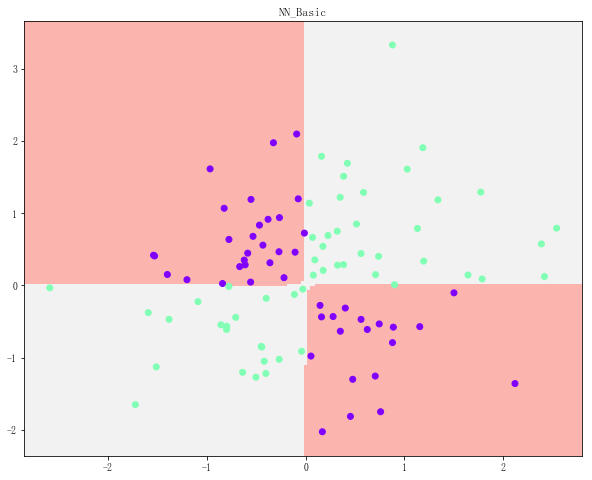

Done.


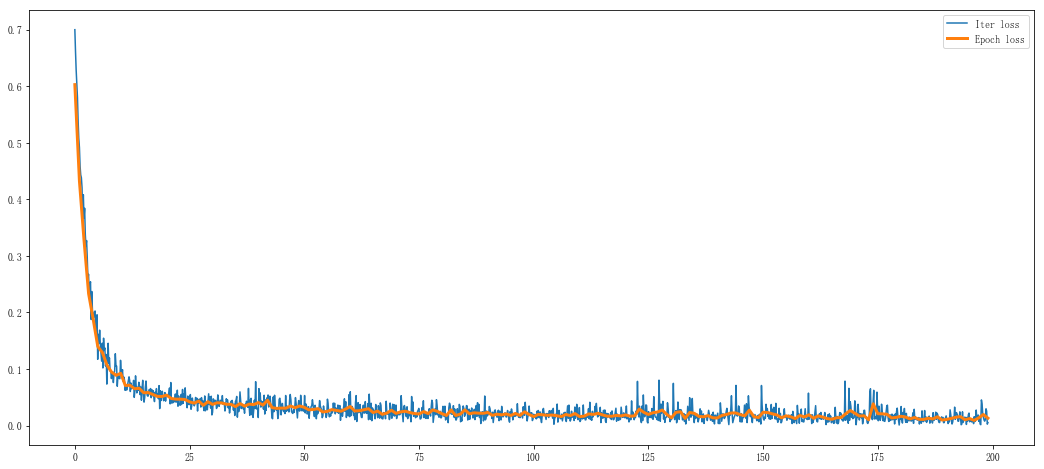

NN_Basic
Decision Time: 0.00501156 s
Drawing figures...


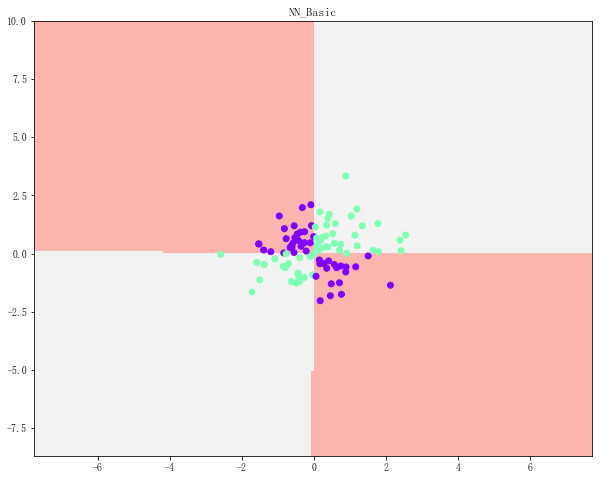

Done.


NN_Basic

In [2]:
x_train, y_train = DataUtil.gen_xor(size=1000, one_hot=False)
x_test, y_test = DataUtil.gen_xor(size=100, one_hot=False)
nn = Basic(model_param_settings={"n_epoch": 200}).fit(x_train, y_train, x_test, y_test, snapshot_ratio=0)
draw_results(nn, x_test, y_test)
plt.rcParams["figure.figsize"] = (10, 8)
nn.visualize2d(x_test, y_test, padding=2)

Epoch      0   Iter        0   Snapshot      0 (acc)  -  Train : 0.167143   Test :     0.17
Epoch     -1   Iter       -1   Snapshot     -1 (acc)  -  Train : 0.998571   Test :      1.0  -  Time Cost: 14.646260738372803
NN_Basic
Decision Time: 0.00802064 s
Drawing figures...


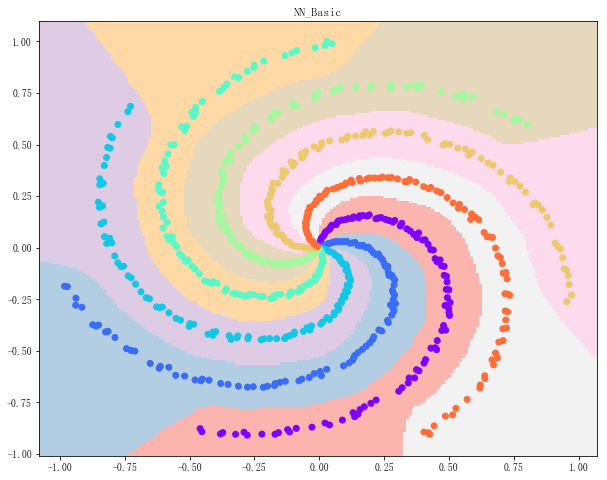

Done.


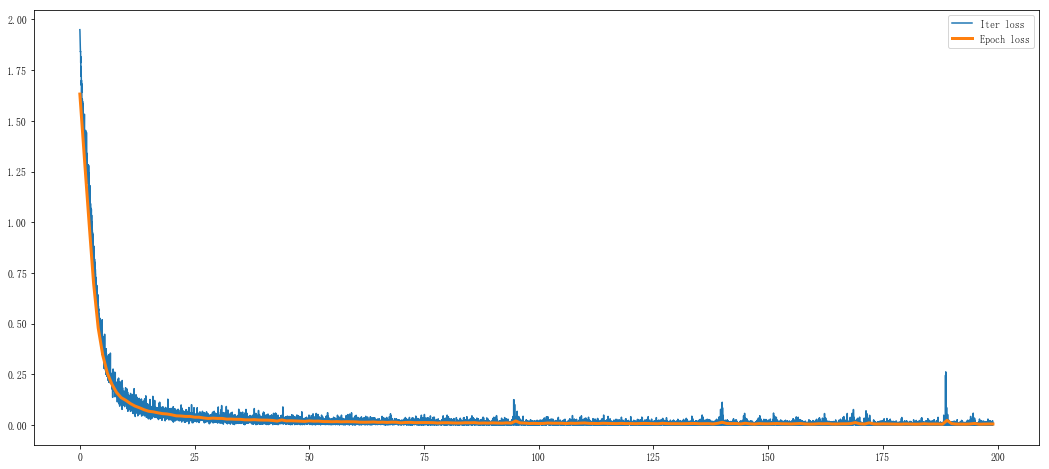

NN_Basic
Decision Time: 0.00801969 s
Drawing figures...


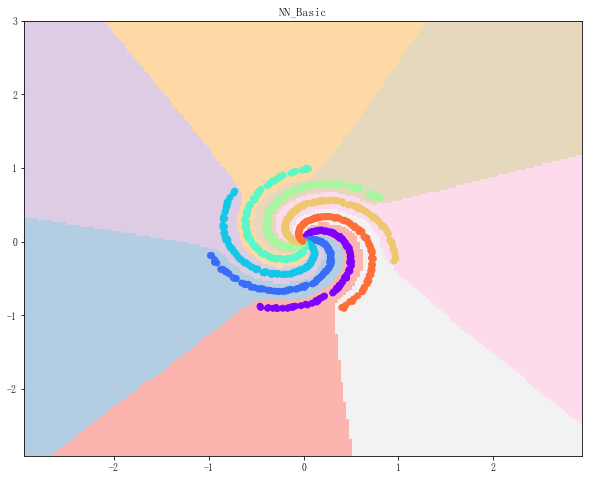

Done.


NN_Basic

In [3]:
x_train, y_train = DataUtil.gen_spiral(size=1000, one_hot=False)
x_test, y_test = DataUtil.gen_spiral(size=100, one_hot=False)
nn = Basic(model_param_settings={"n_epoch": 200}).fit(x_train, y_train, x_test, y_test, snapshot_ratio=0)
draw_results(nn, x_test, y_test)
plt.rcParams["figure.figsize"] = (10, 8)
nn.visualize2d(x_test, y_test, padding=2)

Epoch      0   Iter        0   Snapshot      0 (acc)  -  Train :     0.23   Test :      0.2
Epoch     -1   Iter       -1   Snapshot     -1 (acc)  -  Train :      1.0   Test :     0.98  -  Time Cost: 2.477839469909668
NN_Basic
Decision Time: 0.00501251 s
Drawing figures...


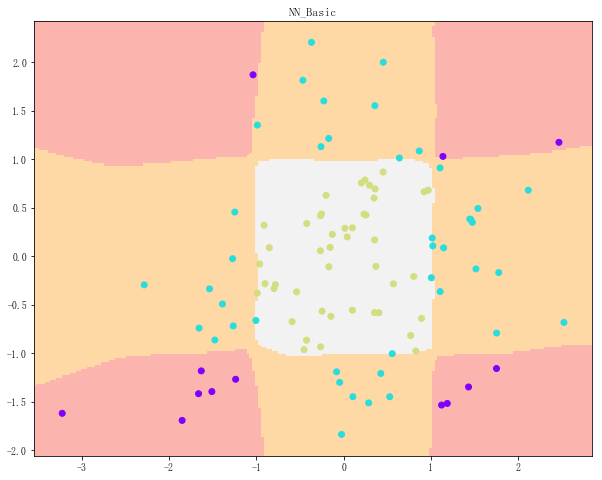

Done.


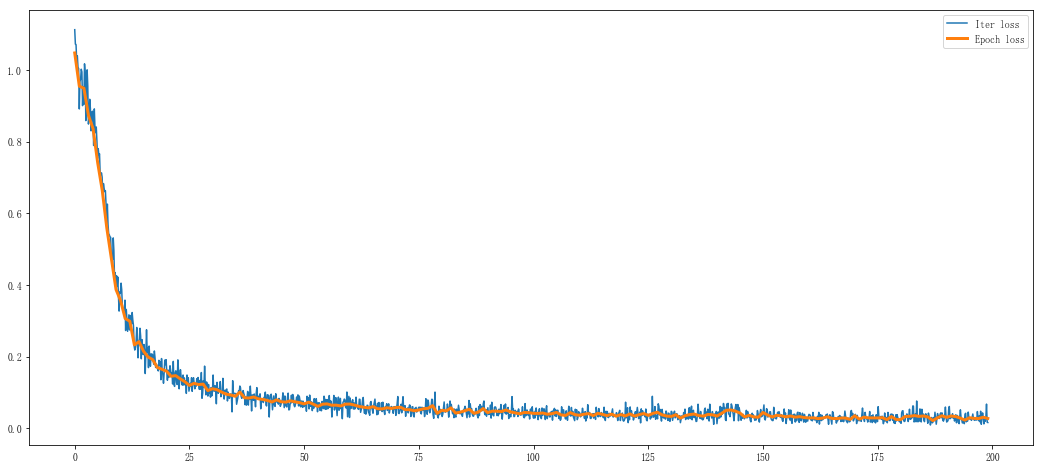

NN_Basic
Decision Time: 0.00601602 s
Drawing figures...


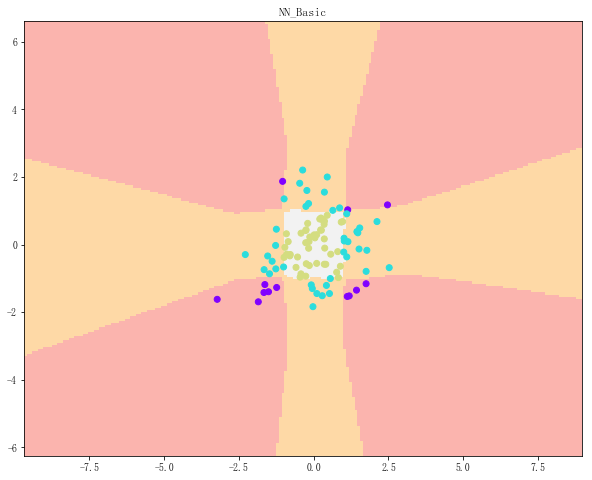

Done.


NN_Basic

In [4]:
x_train, y_train = DataUtil.gen_nine_grid(size=1000, one_hot=False)
x_test, y_test = DataUtil.gen_nine_grid(size=100, one_hot=False)
nn = Basic(model_param_settings={"n_epoch": 200}).fit(x_train, y_train, x_test, y_test, snapshot_ratio=0)
draw_results(nn, x_test, y_test)
plt.rcParams["figure.figsize"] = (10, 8)
nn.visualize2d(x_test, y_test, padding=2)

In [5]:
import math
x, y, x_test, y_test = {}, {}, {}, {}
for size in (100, 1000, 10000):
    (x[size], y[size]), (x_test[size], y_test[size]) = DataUtil.gen_noisy_linear(
        size=int(3 * size/math.log(size, 100)), n_dim=2, n_valid=2, test_ratio=50 / size, one_hot=False)

def train(size, n_epoch=200):
    plt.rcParams["figure.figsize"] = (10, 8)
    nn = Basic(model_param_settings={"n_epoch": int(n_epoch/math.log(size, 100))}).fit(
        x[size], y[size], x_test[size], y_test[size], snapshot_ratio=0).visualize2d(x_test[size], y_test[size])
    plt.rcParams["figure.figsize"] = (18, 8)
    draw_losses(nn)
    plt.rcParams["figure.figsize"] = (10, 8)
    nn.visualize2d(x_test[size], y_test[size], padding=2)

Epoch      0   Iter        0   Snapshot      0 (acc)  -  Train : 0.466667   Test : 0.446667
Epoch     -1   Iter       -1   Snapshot     -1 (acc)  -  Train :      0.7   Test :     0.96  -  Time Cost: 1.2919347286224365
NN_Basic
Decision Time: 0.00400949 s
Drawing figures...


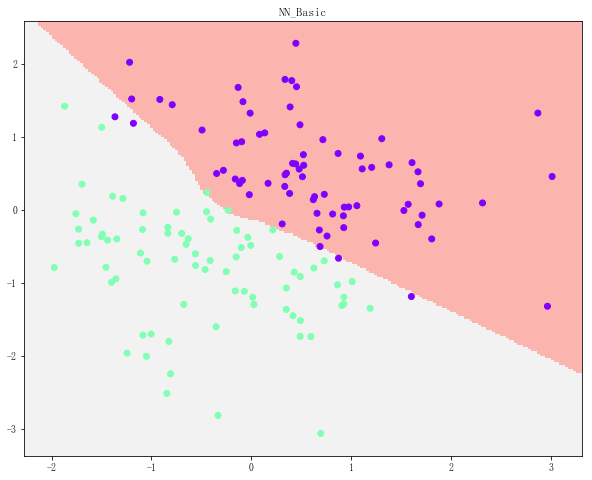

Done.


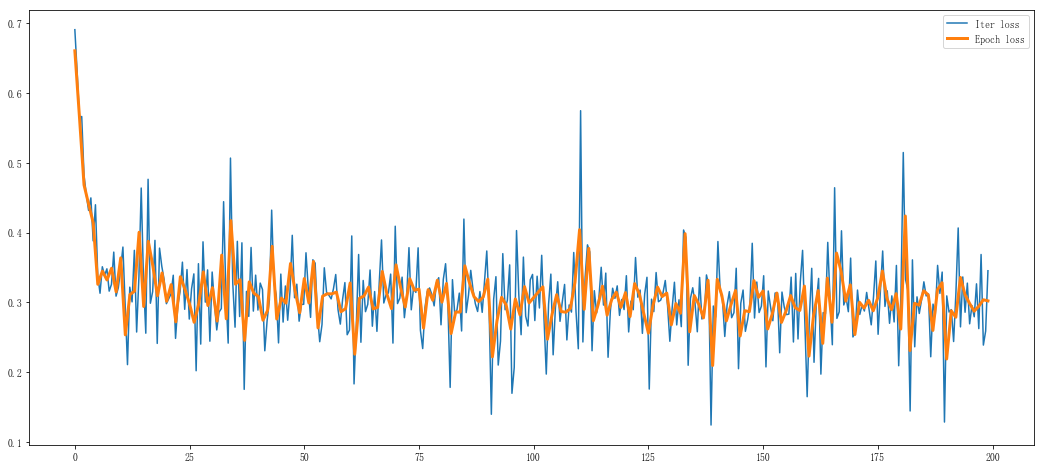

NN_Basic
Decision Time: 0.00501323 s
Drawing figures...


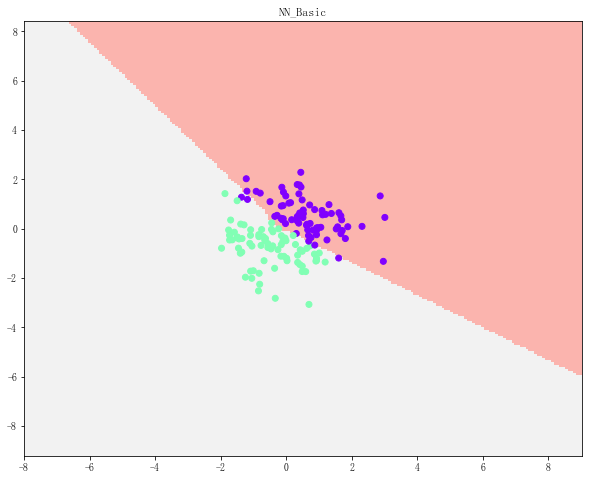

Done.
Epoch      0   Iter        0   Snapshot      0 (acc)  -  Train :      0.5   Test :     0.53
Epoch     -1   Iter       -1   Snapshot     -1 (acc)  -  Train :    0.825   Test :      1.0  -  Time Cost: 3.2902655601501465
NN_Basic
Decision Time: 0.0040102 s
Drawing figures...


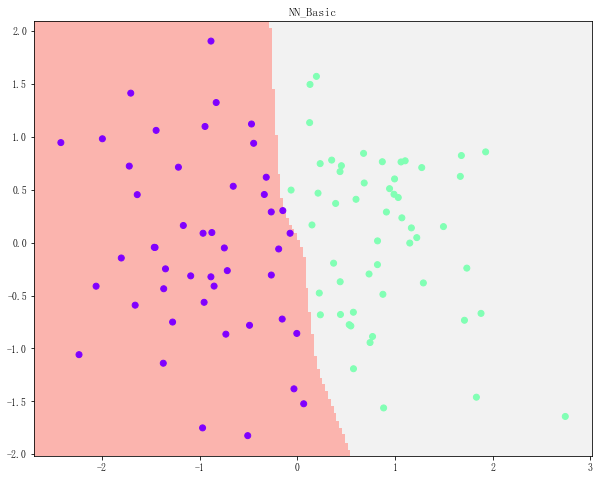

Done.


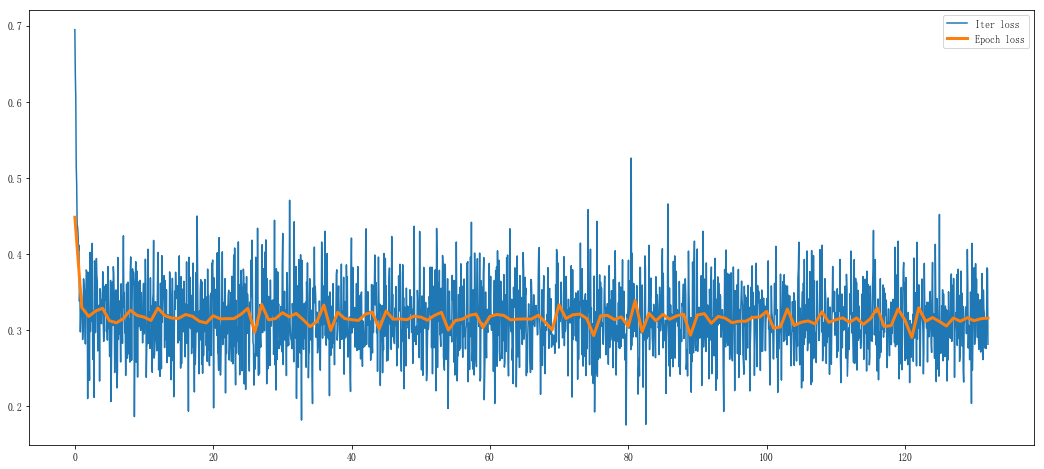

NN_Basic
Decision Time: 0.00601792 s
Drawing figures...


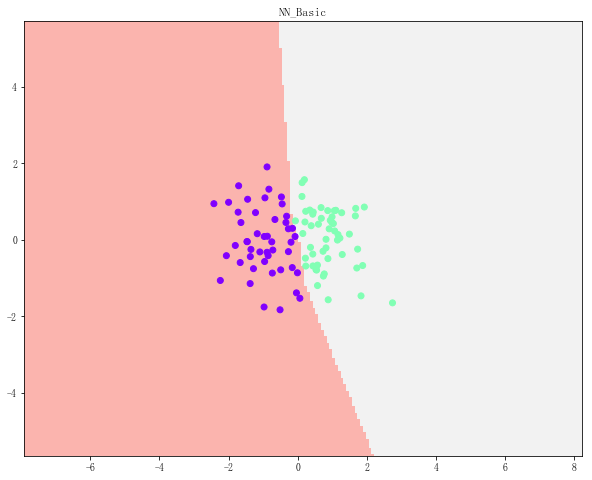

Done.
Epoch      0   Iter        0   Snapshot      0 (acc)  -  Train : 0.308667   Test :      0.2
Epoch     -1   Iter       -1   Snapshot     -1 (acc)  -  Train : 0.852667   Test : 0.946667  -  Time Cost: 15.683290481567383
NN_Basic
Decision Time: 0.00400996 s
Drawing figures...


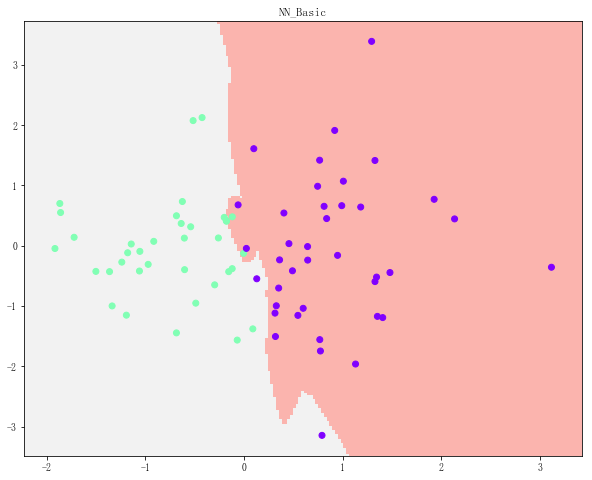

Done.


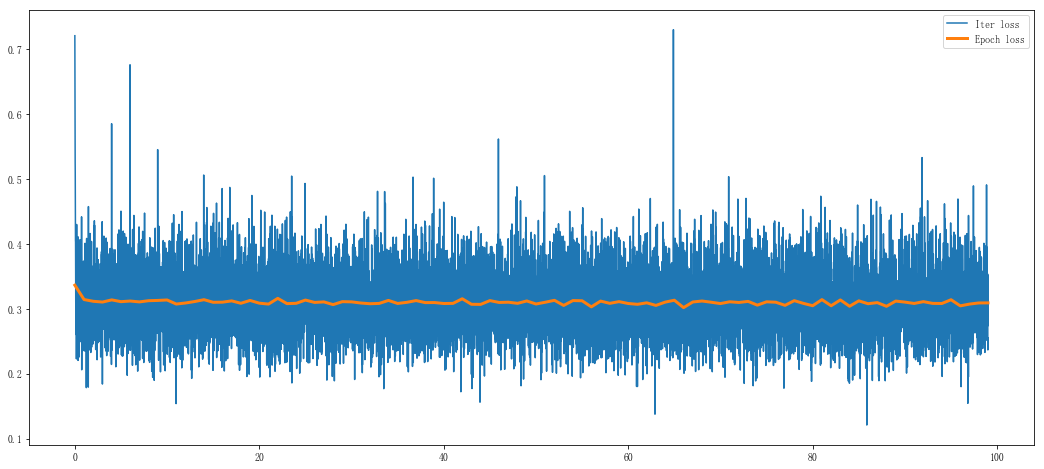

NN_Basic
Decision Time: 0.00501323 s
Drawing figures...


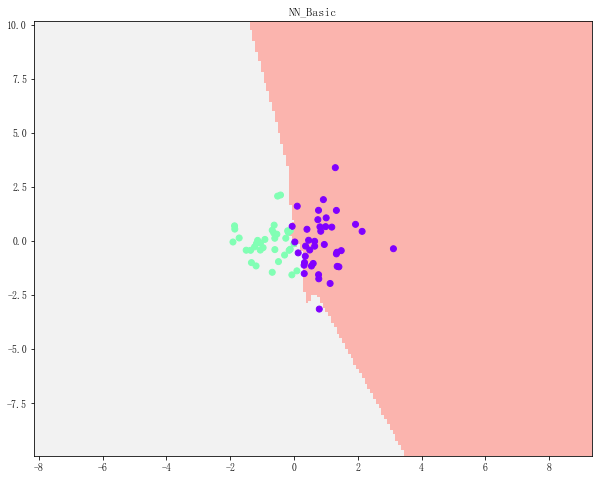

Done.


In [6]:
train(100)
train(1000)
train(10000)